In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r'D:\Bitcoin/bitcoin_price_Training - Training.csv')
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [32]:
df['Date'] = df['Date'].astype('datetime64[ns]')    #alternative for pd.to_datetime()

In [34]:
df['Date'].min()           # Timestamp is a Scaler Class

Timestamp('2013-04-28 00:00:00')

In [20]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [22]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [26]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [30]:
data = df.sort_index(ascending=False).reset_index()
data

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [36]:
data.drop('index' , axis=1 , inplace=True)
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [38]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

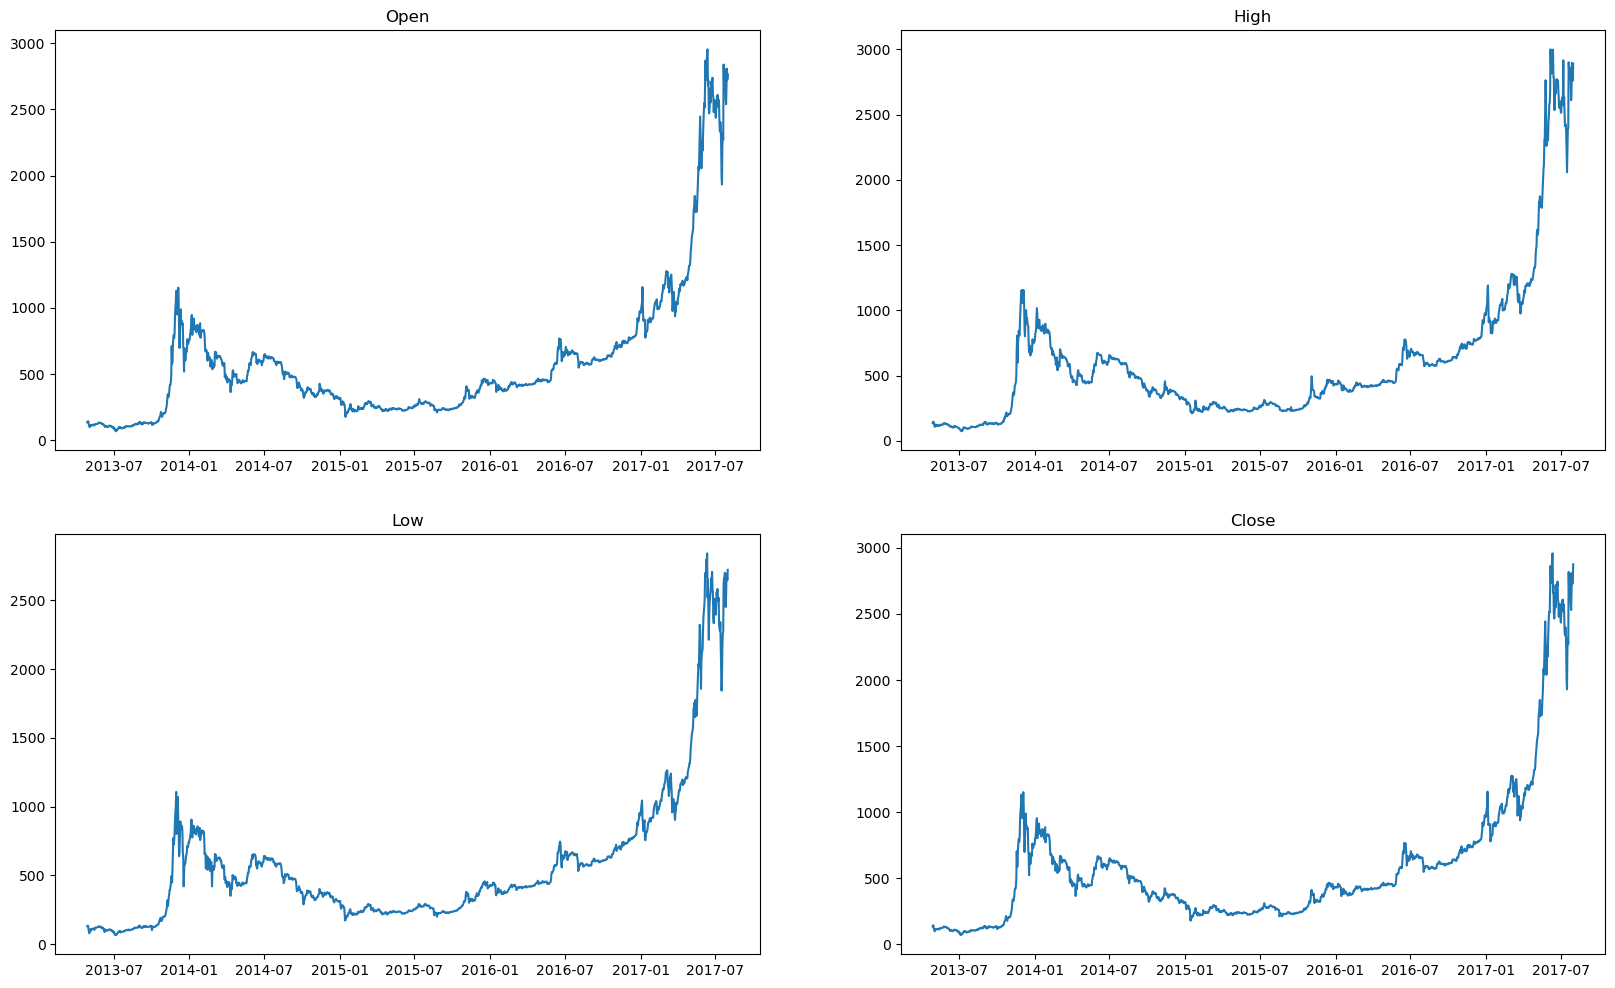

In [40]:
plt.figure(figsize=(20,12))

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

In [52]:
#        Analysing open , high , low , close value of Bitcoin

In [71]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

init_notebook_mode(connected=True)

In [73]:
bitcoin = data

trace = go.Candlestick(x=bitcoin['Date'] ,high =bitcoin['High'] ,open = bitcoin['Open'] , 
                                          close = bitcoin['Close'] , low = bitcoin['Low'])

In [75]:
candle_data = [trace]

layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

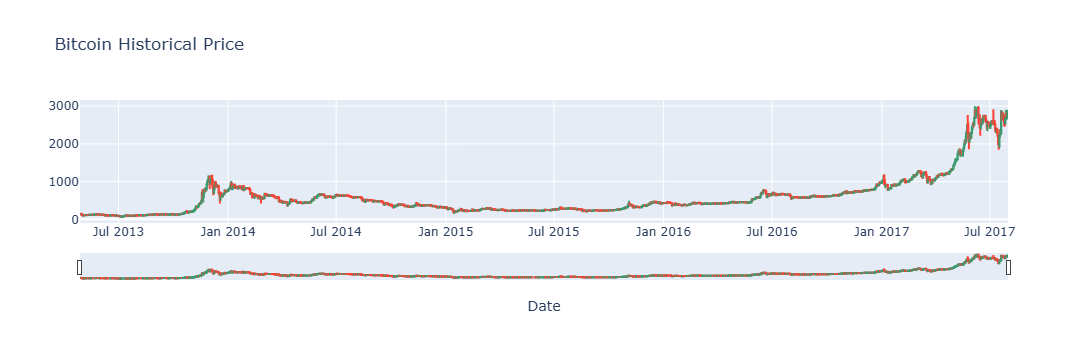

In [81]:
fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

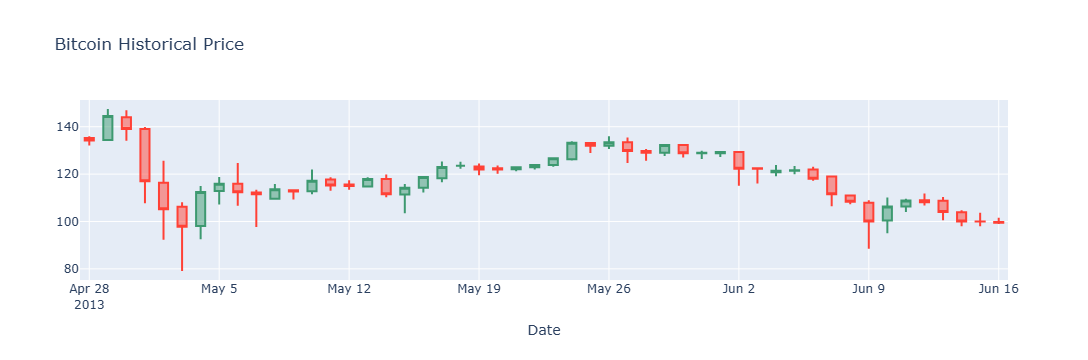

In [79]:
bitcoin_sample = data[0:50]

trace2 = go.Candlestick(x=bitcoin_sample['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close = bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

candle_data2 = [trace2]

layout2 = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

fig = go.Figure(data = candle_data2 , layout=layout2)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [83]:
#                     Analysing closing price (on normal scale & log-scale)

<Axes: >

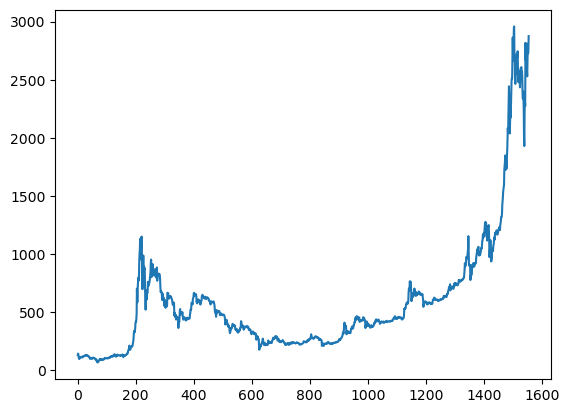

In [85]:
data['Close'].plot()

In [89]:
bitcoin.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [97]:
bitcoin.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [99]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

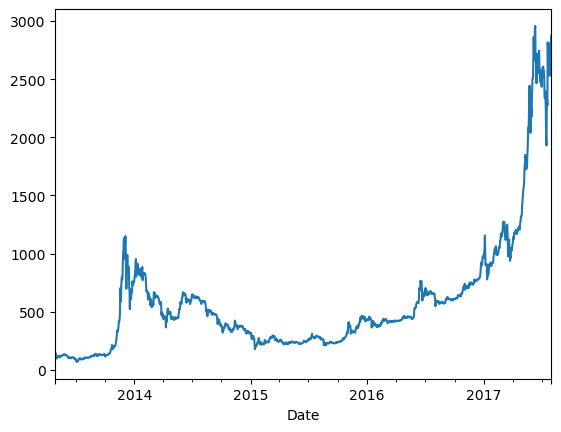

In [101]:
data['Close'].plot()

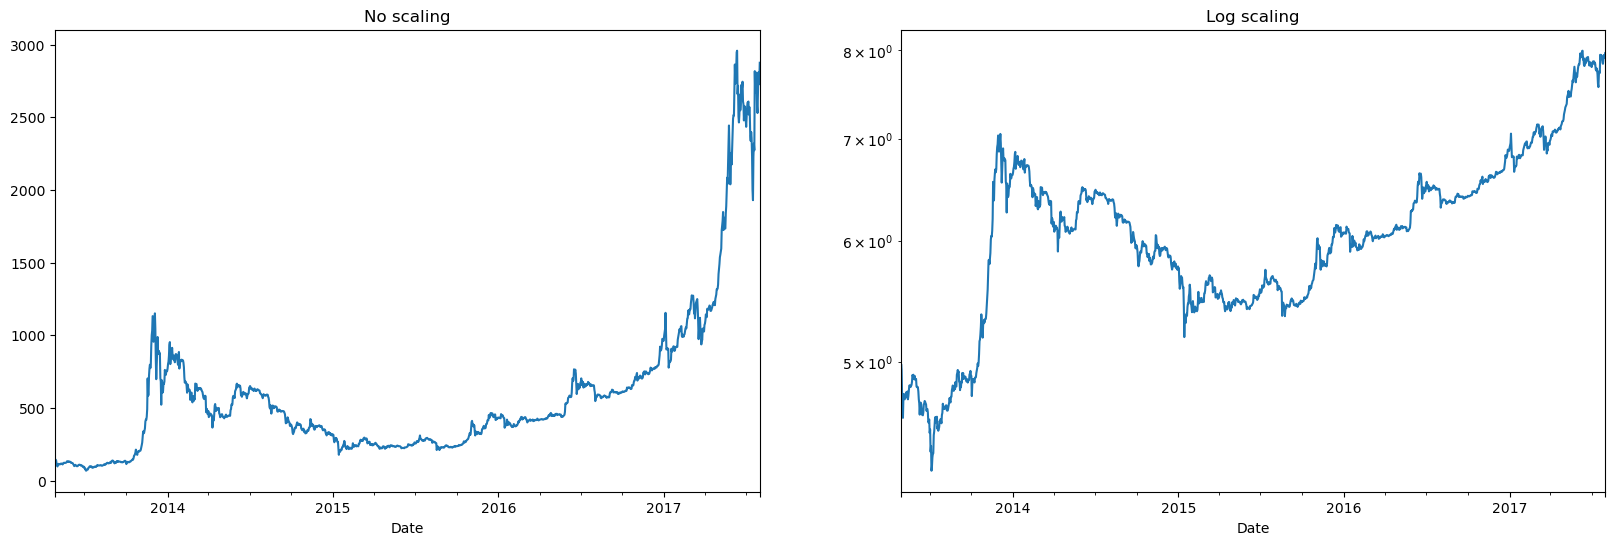

In [103]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [105]:
#                  Analyse closing Price on Yearly , Quarterly , monthly basis

<Axes: xlabel='Date'>

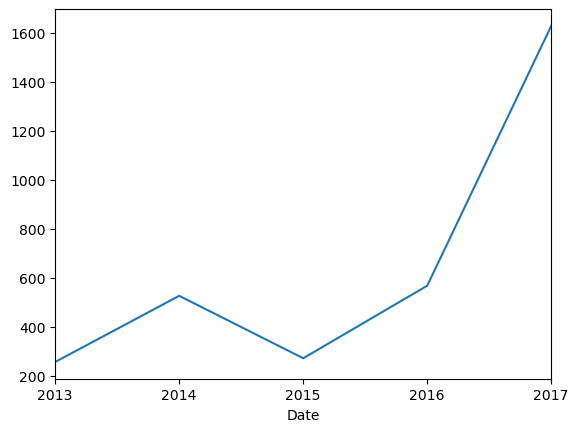

In [113]:
# finding avg price of bitcoin on yearly basis

bitcoin['Close'].resample('YE').mean().plot()

<Axes: xlabel='Date'>

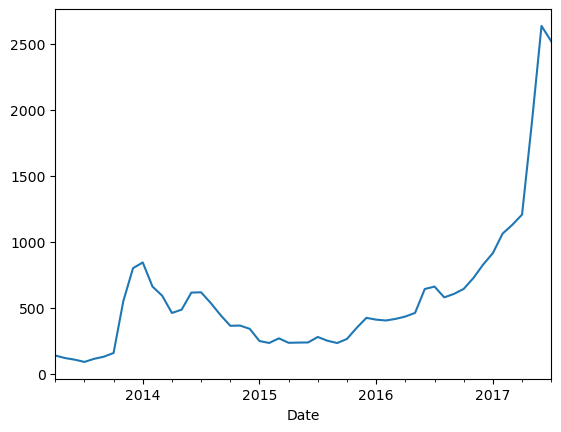

In [125]:
# finding avg price of bitcoin on quarterly basis

bitcoin['Close'].resample('ME').mean().plot()

<Axes: xlabel='Date'>

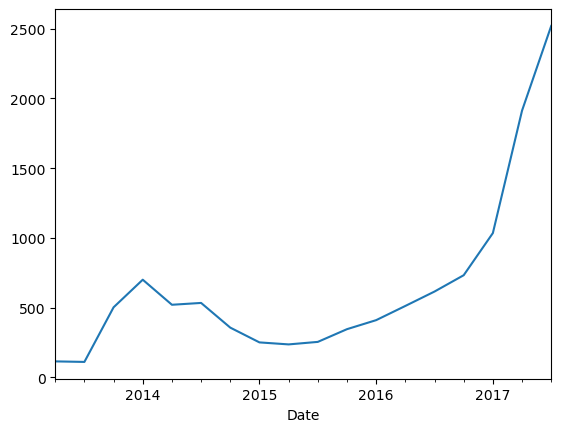

In [123]:
# finding avg price of bitcoin on quarterly basis

bitcoin['Close'].resample('QE').mean().plot()

In [127]:
#            analysing Daily change in Closing price of stocks

In [141]:
bitcoin['Close_price_pct_change'] = bitcoin['Close'].pct_change()*100
bitcoin.dtypes

Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                     object
Market Cap                 object
Close_price_pct_change    float64
dtype: object

<Axes: xlabel='Date'>

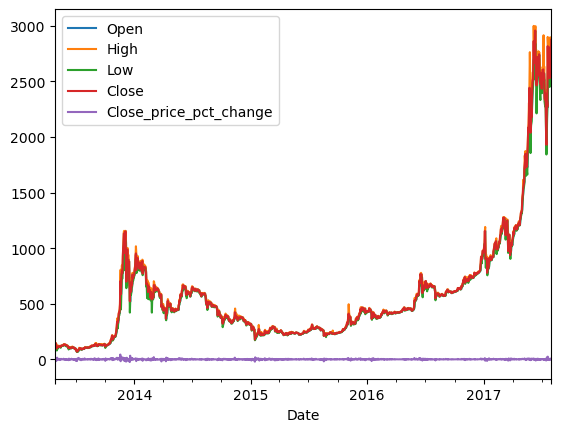

In [131]:
bitcoin.plot()

<Axes: xlabel='Date'>

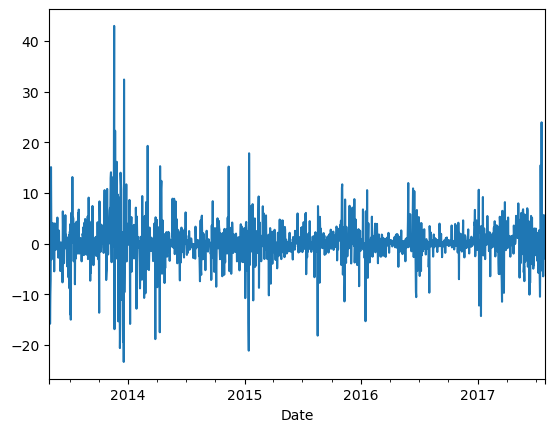

In [133]:
bitcoin['Close_price_pct_change'].plot()

In [139]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

C:\Users\User\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



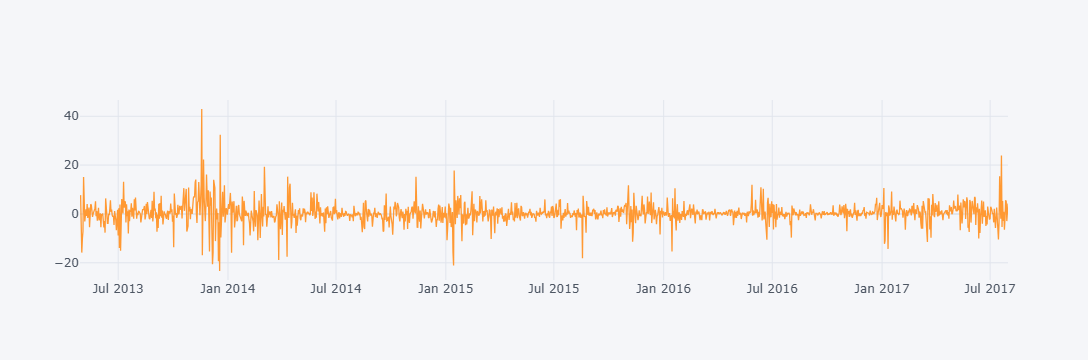

In [143]:
data['Close_price_pct_change'].iplot()